<a href="https://colab.research.google.com/github/rangedayo/first-repository/blob/master/%EC%BA%90%EA%B8%80%EB%8C%80%ED%9A%8C)_%EC%A7%91%EA%B0%92_%EC%98%88%EC%B8%A1_%EB%AA%A8%EB%8D%B8(%2B%EB%B6%84%EC%84%9D_%EB%B0%8F_%EC%88%98%EC%A0%95).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
import pandas as pd

uploaded = files.upload()  # 파일 선택창 뜸

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

Saving test.csv to test (5).csv
Saving train.csv to train (5).csv


# 결측치, 이상치 확인
feature 분석에 앞서서 결측치, 이상치를 먼저 확인하는 게 순서일 듯하다.

In [2]:
train.isnull().sum()

,0
id,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0


In [3]:
(train.isnull().sum() / len(train)).sort_values(ascending=False)

,0
id,0.0
date,0.0
price,0.0
bedrooms,0.0
bathrooms,0.0
sqft_living,0.0
sqft_lot,0.0
floors,0.0
waterfront,0.0
view,0.0


**(train.isnull().sum() / len(train)).sort_values(ascending=False)** <br>
결측치가 몇 %인지 바로 감이 옴

1~2% → 처리해서 사용<br>
30% 이상 → 제거 고려

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15035 entries, 0 to 15034
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15035 non-null  int64  
 1   date           15035 non-null  object 
 2   price          15035 non-null  float64
 3   bedrooms       15035 non-null  int64  
 4   bathrooms      15035 non-null  float64
 5   sqft_living    15035 non-null  int64  
 6   sqft_lot       15035 non-null  int64  
 7   floors         15035 non-null  float64
 8   waterfront     15035 non-null  int64  
 9   view           15035 non-null  int64  
 10  condition      15035 non-null  int64  
 11  grade          15035 non-null  int64  
 12  sqft_above     15035 non-null  int64  
 13  sqft_basement  15035 non-null  int64  
 14  yr_built       15035 non-null  int64  
 15  yr_renovated   15035 non-null  int64  
 16  zipcode        15035 non-null  int64  
 17  lat            15035 non-null  float64
 18  long  

컬럼 타입 확인 (int / float / object)

NaN 존재 여부 확인

In [5]:
train.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,15035.000000,1.503500e+04,15035.000000,15035.000000,15035.000000,1.503500e+04,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000
mean,7517.000000,5.406827e+05,3.369139,2.115065,2083.790223,1.529697e+04,1.498071,0.007117,0.234253,3.406651,7.660725,1794.158164,289.632059,1971.100432,83.798936,98078.031726,47.560721,-122.213677,1992.754772,12823.884935
std,4340.374984,3.715247e+05,0.902721,0.767519,922.134087,4.261282e+04,0.538522,0.084063,0.763376,0.646505,1.179803,831.738609,440.663284,29.407612,400.398498,53.297815,0.138164,0.141294,691.456442,27736.259787
min,0.000000,7.800000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3758.500000,3.220000e+05,3.000000,1.750000,1430.000000,5.027500e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.472700,-122.328000,1490.000000,5100.000000
50%,7517.000000,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1570.000000,0.000000,1975.000000,0.000000,98065.000000,47.571900,-122.231000,1850.000000,7610.000000
75%,11275.500000,6.450000e+05,4.000000,2.500000,2560.000000,1.069550e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2230.000000,550.000000,1997.000000,0.000000,98117.000000,47.678300,-122.126000,2360.000000,10076.000000
max,15034.000000,7.700000e+06,10.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4130.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
numeric_cols = train.select_dtypes(include=['int64', 'float64']).columns

train[numeric_cols].describe().T[['min', 'max']]

,min,max
id,0.0000,1.503400e+04
price,78000.0000,7.700000e+06
bedrooms,0.0000,1.000000e+01
bathrooms,0.0000,8.000000e+00
sqft_living,290.0000,1.354000e+04
sqft_lot,520.0000,1.651359e+06
floors,1.0000,3.500000e+00
waterfront,0.0000,1.000000e+00
view,0.0000,4.000000e+00
condition,1.0000,5.000000e+00


train.describe()와

numeric_cols = train.select_dtypes(include=['int64', 'float64']).columns
train[numeric_cols].describe().T[['min', 'max']]

위의 두 코드로 이상치를 알아보려고 했는데, 숫자를 해석 못하겠다.

결측치는 없었으니, 이상치를 판단하는 건 따로 공부해보는 걸로.

# feature 분석

데이터셋 정보 나옴
https://sites.google.com/view/vinegarhill-datalabs/introduction-to-machine-learning/kings-county-house-prices?utm_source=chatgpt.com

- 미국 워싱턴주 King County의 주택 매매 데이터
- 거래 시기: 2014년 5월 ~ 2015년 5월 (1년치 거래 내역)



##1. date
모범 코드에서는 date를 년월까지만 가공했길래 의미가 있나 싶어서 알아보기로 했다.
그리고 기존 모범 코드에서 해당 년/월을 나눠서 그래프 만들려고 하니 에러가 떠서
```
train['date'] = train['date'].apply(lambda x : x[:6]).astype(int)
test['date'] = test['date'].apply(lambda x : x[:6]).astype(int)
```
이 부분은 삭제하고 다시 짰다.<br><br>
year: <br>
한국에서는 1년 주기로 봤을 때 1~2월에 거래량이 다소 많아지는 경향이 있어 미국도 그런가 싶었는데, 데이터를 살펴보니 1년치 거래 내역 밖에 안돼서 이전과 비교하여 판단할 여지가 없었음.<br>

month: <br>
1년 내의 월별 거래량이 많았던 적이 있는지 확인함.
**4~6월 사이 많은 걸로 나옴**. 해당 월이 되면 집값이 오른다고 단정 지을 수는 없지만, 데이터 상 높게 나온 건 사실이므로 의미있는 feature로 생각하기로 했다.

In [7]:
# date 컬럼을 year, month 컬럼으로 나눔
train['date'] = pd.to_datetime(train['date'])
test['date'] = pd.to_datetime(test['date'])

train['year'] = train['date'].dt.year
train['month'] = train['date'].dt.month

test['year'] = test['date'].dt.year
test['month'] = test['date'].dt.month

<Axes: xlabel='month'>

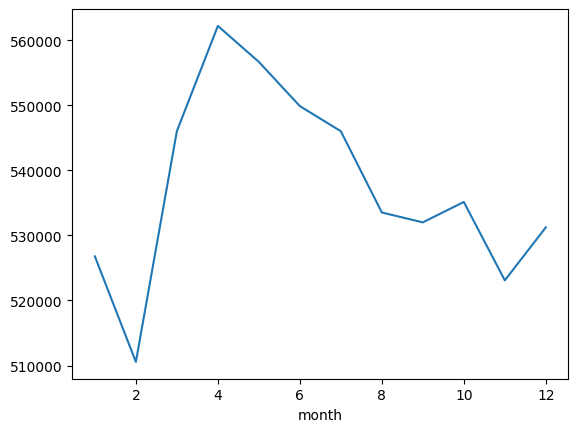

In [8]:
train.groupby('month')['price'].mean().plot()

## 2. bedrooms
침실이 3~5개까지는 집값 증가폭이 크다가, 6개 이상이면 증가폭이 줄어들면서 8개 이후부터 가격이 오히려 낮아짐을 볼 수 있다.<br>

결론 : **3~5개까지의 데이터가 집값 상승에 영향을 준다**

<Axes: xlabel='bedrooms'>

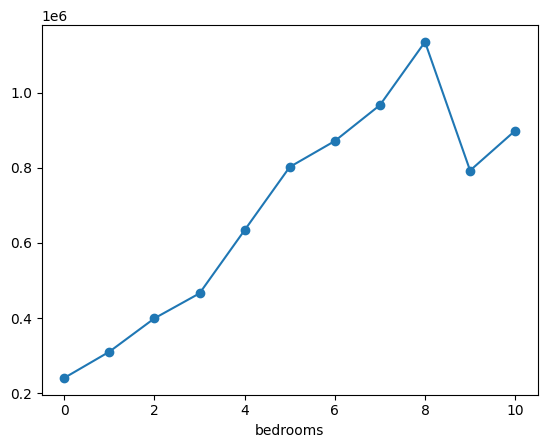

In [9]:
train.groupby('bedrooms')['price'].mean().plot(marker='o')

## 3. bathrooms
미국에서는 bedroom보다 bathroom이 더 많은 집을 좋아한다고 한다.<br>
bathrooms가 많다는 건 보통 고급 주택일 확률이 높고, 생활 편의성이 좋아서 더 선호한다고 함. 사실 bedrooms이 많은 것도 그렇게 따지면 고급 주택인 거 아닌가 싶긴한데, 미국의 생활양식은 bedrooms가 많다고 고급주택은 아닌가 봄.

<Axes: xlabel='bathrooms'>

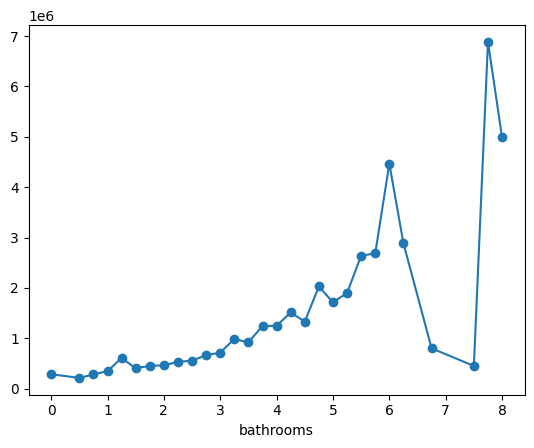

In [10]:
train.groupby('bathrooms')['price'].mean().plot(marker='o')

bathrooms 1 ~ 5 : 가격이 비교적 안정적으로 상승 <br>
bathrooms 6 ~ 7 : 평균 price 급락 <br>
bathrooms 8 : 평균 price 급등

처음 그래프를 해석할 때는 단순히 bathrooms이 6~7개일 때는 사람들 선호도가 없어서 가격이 훅 떨어지나보다 생각했는데, 알고보니 전형적인 '표본 수 부족'으로 가격 평균이 잘못 잡힌거라고 한다.


<Axes: xlabel='bathrooms'>

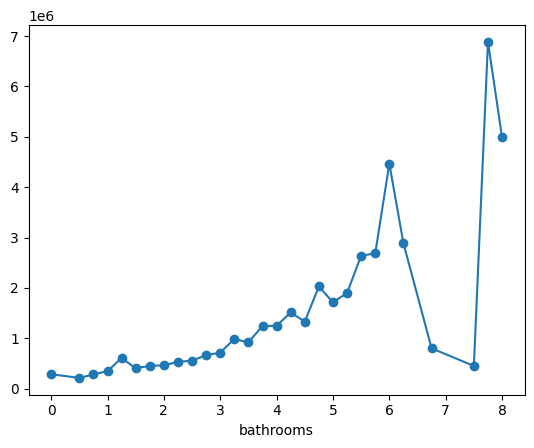

In [11]:
train.groupby('bathrooms')['price'].mean().plot(marker='o')

In [12]:
train.groupby('bathrooms')['price'].count()

,price
bathrooms,
0.00,4
0.50,3
0.75,45
1.00,2675
1.25,5
1.50,1009
1.75,2112
2.00,1357
2.25,1433


위 데이터를 보면 bathroom이 6~7개일 때 1, 2채씩 밖에 안 나온다.<br>
다른 데이터에 비해 특점 범위의 데이터 수가 너무 작은 상태에서 평균을 내면, 그 집 한 채가 곧 평균이기 때문에 이외에 다른 feature의 개입이 있을 때(위치가 안좋거나, 집이 오래됐거나 등) 평균이 뚝 떨어진다.<br>
다르게 표현하면 현재 데이터셋의 데이터로만 보면 이정도 평균값이 나오긴 하지만, 만약 bathroom에 대한 데이터가 더 많았을 때의 가격값은 충분히 달라질 수 있다는 것을 의미하기에 단순히 bathroom 개수별로 가격이 이렇다고 땅땅 결론을 내기에는 성급한 일반화가 될 수도 있다.

→ 결론 : **bathroom이 6~7개가 price 형성에 영향을 끼친다.**

## 4. floors
층이 있고 없고가 집값에 영향을 미칠까?

<Axes: xlabel='floors'>

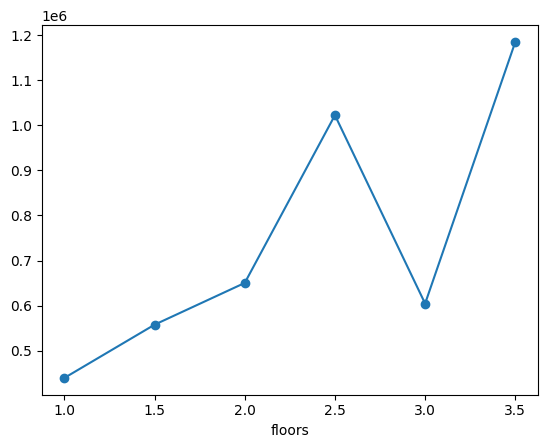

In [13]:
train.groupby('floors')['price'].mean().plot(marker='o')

floors 데이터도 마찬가지로 갑자기 훅 꺾이는 걸로 보아 2.5층 이후로 데이터가 너무 적어서 floors별 price값 형성에 유의미한 영향을 준다고 판단하기엔 다소 무리가 있다. 다만 **단독 영향은 미미하지만 특정 조건에서 의미가 있는 feature라고 하니 킵.**

In [14]:
# date 컬럼 지우기
train = train.drop(columns=['date'])
test = test.drop(columns=['date'])

# year 컬럼 지우기
train = train.drop(columns=['year'])
test = test.drop(columns=['year'])

date 컬럼은 이미 year, month로 나눴으므로 지우고, year 컬럼도 큰 의미가 없기 때문에 지웠음

## 5. sqft_living
실제로 사람이 사는 실내 면적을 뜻한다.<br>
한국에서는 30평대가 국민 평수라고 해서 제일 수요 높고, 가격 상승률도 높은 것으로 알고 있다. 물론 평수가 커질수록 가격은 더 높은 게 사실이지만, 특정 지역에서는 국민 평수가 오히려 더 넓은 평수보다 더 비싼 호가로 거래되는 곳도 있다고 한다. 미국은 어떤지 보자.

<Axes: xlabel='sqft_living'>

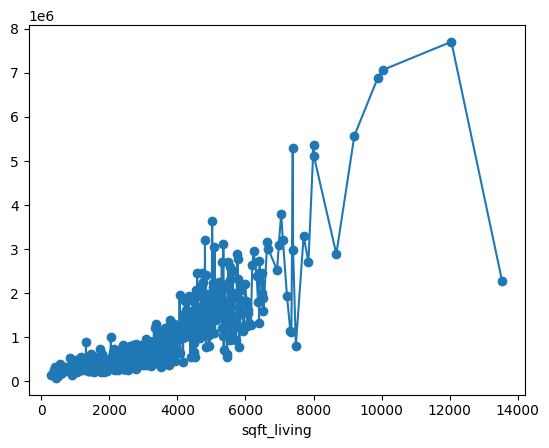

In [15]:
train.groupby('sqft_living')['price'].mean().plot(marker='o')

In [16]:
train['sqft_living'].corr(train['price'])

np.float64(0.7028989824942344)

그래프로는 알 수가 없어서 상관계수로 확인해봤다.<br>
머신러닝에서 0.65 ~ 0.75 수준이면 강한 양의 관계로 봐도 무방하다고 한다.

**np.log1p(train['sqft_living']).corr(np.log1p(train['price']))**
이 코드를 쓰면 비선형 + 이상치 문제를 줄여줘서 상관관계를 더 깔끔하게 볼 수 있다고 하더라. 결과를 보면 선형에 더 가깝게 나온다.

실제로도 미국에서의 '면적'은 방 개수, 욕실 개수, 층수, 구조 등을 한번에 대변해줄 수 있는 집값에 있어 영향력있는 조건이라고 한다.<br>
**집값에 큰 영향력을 끼칠 수 있는 존재이므로 찜**

## 6. sqft_lot

마당을 포함한 대지 면적을 말한다.<br>
대지 면적이 넓으면 비싼걸까? 한국만 봐도 땅이 넓다고 땅값이 비싼 게 아니듯, 시골과 도시로 비교해도 도시가 땅이 작음에도 가격은 훨씬 비싸다는 사실을 알 수 있다. 미국도 비슷하지 않을까 싶은데, 확인해보자.

In [17]:
train['sqft_lot'].corr(train['price'])

np.float64(0.09679269664183698)

상관계수가 0.09다. 이 정도는 sqft_lot이 price에 영향을 못 미친다고 보면 될 것 같다.

## 7. sqft_above
지하(basement)를 제외한 땅 위에 노출된 층들의 실내 면적 합을 말한다.<br>
예를 들어 지하가 없는 1,2층 집이 있는데 각 층마다 1000 sqft인거다.<br>
그럼 sqft_above = 2000, sqft_living = 2000

만약 지하가 800 sqft, 1층이 1200 sqft이다.<br>
그럼 sqft_above = 1200, sqft_living = 2000

sqft_above라는 개념이 생겨난 이유는, 지상 공간을 사람이 실제로 사는 공식적인 주거 공간으로 인정하기 때문에, 같은 2000 sqft라 하더라도 지상 sqft가 많은 집을 선호한다고 한다.

그래서 실제로 이 조건이 price에 영향을 미치는지 보도록 하자.

In [18]:
import numpy as np

np.log1p(train['sqft_above']).corr(np.log1p(train['price']))

np.float64(0.5911854993214544)

sqft_living만큼이나 강한 양의 상관관계를 가진다. 사실상 sqft_living에 sqft_above이 포함되어있어서 둘 중 하나를 골라야 하는데, 개인적인 생각으로는 국민평수를 보고 사람들이 아파트를 고르듯, 쉽게 판단할 수 있는 조건으로 대표성을 띄는 sqft_living를 쓰는 게 낫지 않을까란 생각이 든다.

## 8. sqft_basement
sqft_living에 sqft_above까지 봐버렸으니 굳이 지하 면적까지 볼 필요가 있겠나 싶었다만, 추후에 더 알아본 결과 이 컬럼이 다른 컬럼과 연결되었을 때 price 형성에 영향을 미친다고 한다.

이유 1. 지하가 있고 없고의 차이가 가격에 영향을 미침<br>
이유 2. 고급 주택에서는 지하가 단순히 지하가 아님. 영화관, 헬스장,...

In [19]:
train.groupby(train['sqft_basement'] > 0)['price'].mean()

,price
sqft_basement,
False,487982.397681
True,622461.070604


지하 면적이 있고 없고의 가격 차이가 있다.

## 9. sqft_living15
주변 이웃 15채의 평균 실내 면적을 뜻한다.<br>
그럼 이웃집 면적 평균에 비해 내 면적은 어떤지 볼 수 있고, 내 면적이 높다는 것은 무엇을 의미하는지 알아야 한다.

In [20]:
train['living_ratio'] = train['sqft_living'] / train['sqft_living15']
train['living_ratio']

,living_ratio
0,0.880597
1,0.283088
2,0.933333
3,0.766309
4,0.642424
...,...
15030,1.000000
15031,1.712195
15032,1.000000
15033,1.262295


위 코드는 이웃집 면적에 비해 내 집이 큰지, 작은지를 알려주는 수치다.

train['living_ratio'] > 1 : 동네 평균보다 큼<br>
train['living_ratio'] ≈ 1 : 평균적인 집<br>
train['living_ratio'] < 1 : 평균보다 작음

In [21]:
train.groupby(pd.qcut(train['living_ratio'], 5))['price'].mean()

/tmp/ipython-input-1108261622.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train.groupby(pd.qcut(train['living_ratio'], 5))['price'].mean()


,price
living_ratio,
"(0.178, 0.839]",423671.803856
"(0.839, 0.984]",488266.592285
"(0.984, 1.036]",503850.938124
"(1.036, 1.22]",568993.849019
"(1.22, 6.0]",718656.746591


구간별 평균 가격을 보여주는 표이다.

내 집이 상대적으로 작을수록 집값이 싸고, 내 집이 클수록 집값이 비싸다는 걸 알 수 있다. 즉, **동네에서 큰 집일수록 평균적으로 더 비싸다**.

## 10. sqft_lot15
주변 이웃 15채의 평균 대지 면적을 뜻한다.<br>
주변 집의 대지 내 대지 면적을 비교해본다는 게 무슨 의미일까?<br>
sqft_lot와 같은 의미로 단순히 땅이 넓은 게 좋고 가격이 비싸다는 걸 의미하지는 않는다. 다만 다른 이웃 대지에 비해 내 대지가 넓다면 고가 주택일 수도 있지 않을지 생각해볼만한 문제다.

In [22]:
train['lot_ratio'] = train['sqft_lot'] / train['sqft_lot15']
train.groupby(pd.qcut(train['lot_ratio'], 5, duplicates='drop'))['price'].mean()

/tmp/ipython-input-1929183564.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train.groupby(pd.qcut(train['lot_ratio'], 5, duplicates='drop'))['price'].mean()


,price
lot_ratio,
"(0.054, 0.903]",534793.936482
"(0.903, 1.0]",514926.621142
"(1.0, 1.153]",534562.089816
"(1.153, 87.527]",604282.356169


수치를 보면 극단적으로 큰 lot_ratio에서만 가격이 비싸다.
즉, 엄청 비싼 집인 경우에 의미있는 feature라는 걸 볼 수 있다.

# 11. waterfront vs view
waterfront : 근처에 바로 바다, 강이 있는 집인가의 여부를 알려주는 컬럼이다.<br>

view : 조망이 어느정도 있는지 등급 매긴 컬럼이다.

컬럼 단어만 봐도 집값과 상관관계가 상당히 있을 것 같은데 한번 확인해보자.

In [23]:
train.groupby('waterfront')['price'].mean()

,price
waterfront,
0,5.323243e+05
1,1.706784e+06


waterfront = 1일 때가 0일 때보다 2배 이상이다.

In [24]:
train.groupby('view')['price'].mean()

,price
view,
0,4.962857e+05
1,7.872060e+05
2,8.056546e+05
3,9.866276e+05
4,1.499979e+06


view가 좋을수록 확실히 가격도 높아지는 걸 볼 수 있다.

다만 waterfront의 있고 없고의 효과가 압도적으로 큰 이유는
view는 혹시라도 주변에 다른 건물이 생기게 되면 풍경을 가리게 되니까 매력이 사라질 가능성이 있지만, waterfront의 경우에는 대체 불가능하기 때문이다.


In [25]:
train.groupby(['waterfront', 'view'])['price'].mean()

waterfront  view
0           0       4.962857e+05
            1       7.878402e+05
            2       7.940232e+05
            3       9.832036e+05
            4       1.295469e+06
1           1       6.350000e+05
            2       2.341000e+06
            3       1.074429e+06
            4       1.784413e+06
Name: price, dtype: float64

waterfront와 view의 관계성도 볼 수 있다.

waterfront = 1 → view도 높은 경우 많음
waterfront인데 view 낮은 집 → 상대적으로 저렴

결론 : **waterfront 안에서도 view가 가격 차이를 만든다**는 것을 볼 수 있음.

## 12. lat, long vs zipcode
위도와 경도는 위치 정보를 담고 있기 때문에 위치가 가격에 미치는 영향을 반영할 수 있을 듯하다.
다만 위도, 경도만 넣고 모델 학습시킬 때는 이 수치를 다른 식으로 변형해서 써야하는데, 방법을 알려줘도 이해를 못하겠음.

그래서 zipcode를 가공해서 사용해볼까 한다.
그리고 **우편번호이니까** 당연히 구역별로 집값을 확인해볼 수 있을거고, **비슷한 집값 수준을 가진 집들이 몰려 있을 가능성이 높다.**

## 13. condition
유지 보수 상태를 보여주는 컬럼이다.
컨디션이 안 좋으면 당연히 집값 하락이 되지 않을까? 실제로 어떤지 보자.

In [26]:
train.groupby('condition')['price'].mean().sort_index()

,price
condition,
1,276592.857143
2,325228.945455
3,541062.528337
4,526107.457533
5,612704.427706


**condition이 좋을수록 평균 가격이 높아지는 걸 확인할 수 있다.**

## 13. grade
미국 부동산에서 grade는 집의 구조적 품질과 마감 수준을 종합적으로 평가한 점수를 의미한다고 한다. 단순히 유지보수 상태(condition)가 아니라, 건물 자체의 품질과 재료, 마감, 설계 수준까지 반영하여 등급을 매긴다고 함.

condition보다 더 high level인 것 같으니, 집값을 판단함에 있어 더 중요한 요소가 아닐까 싶다.

In [27]:
train['sqft_living'].corr(train['grade'])

np.float64(0.7625426812158168)

**상관관계가 상당히 높다.** price 책정에 있어 중요한 요소인 것으로 판단된다.

**리모델링을 한 집의 가격이 더 비싸다는 사실을 알 수 있다.**

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51665 (\N{HANGUL SYLLABLE JIB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


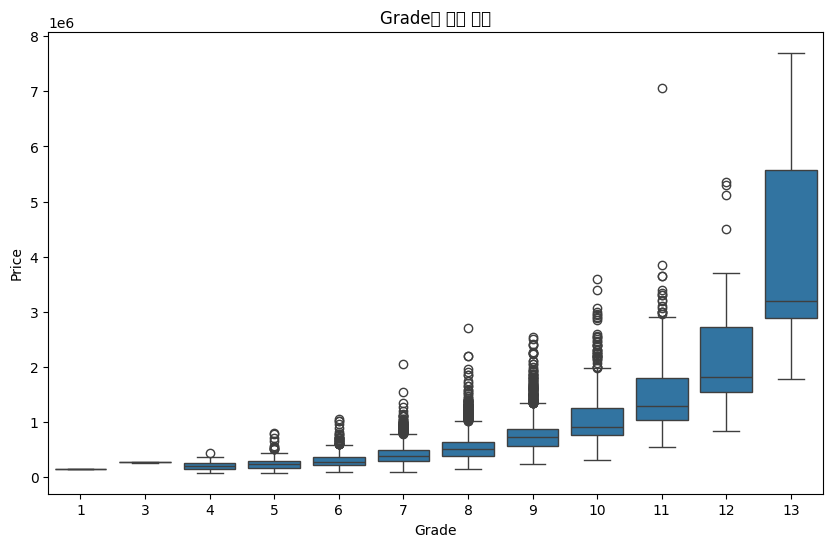

In [28]:
# grade별 평균 가격 확인
train.groupby('grade')['price'].mean().sort_index()

# 시각화
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.boxplot(x='grade', y='price', data=train)
plt.title('Grade별 집값 분포')
plt.xlabel('Grade')
plt.ylabel('Price')
plt.show()

## 14. yr_built
건축 연도로, 쉽게 말해서 '연식'을 뜻한다.
일반적으로 생각해도 구축보다는 신축을 선호하듯이, 미국에서도 노후화된 건물보다 새로 지은 건물이 깔끔하고 또 집 구조나 에너지 효율성 측면에도 유리하지 않을까 생각한다.

In [29]:
train['sqft_living'].corr(train['yr_built'])

np.float64(0.315927491546652)

## 15. yr_renovated
노후된 집을 새롭게 리모델링을 했기 때문에 기존의 집값보다는 가격이 오를 수 있다고 생각한다.
리모델링의 여부, 리모델링한지 얼마나 지났는지가 가격에 영향을 줄 가능성이 있다.

In [30]:
train['renovated'] = train['yr_renovated'].apply(lambda x: 0 if x == 0 else 1)
train.groupby('renovated')['price'].mean()

,price
renovated,
0,529753.762983
1,790159.251981


엄청 높은 양의 상관관계는 아니지만 **적당한 상관관계로서 의미를 가지고 있다.**

# 데이터 준비 및 모델 학습 진행

In [31]:
# 모델 학습 진행
import pandas as pd
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error
from google.colab import files

In [32]:
# 입력 변수, 목표 변수 만들기
y = train['price']
del train['price']

In [33]:
print(train.columns)

Index(['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'month', 'living_ratio', 'lot_ratio',
       'renovated'],
      dtype='object')


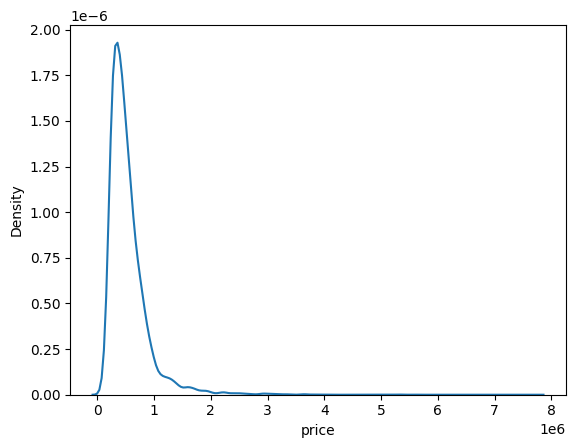

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.kdeplot(y)
plt.show()

In [35]:
import numpy as np

y = np.log1p(y)
y

,price
0,12.309987
1,12.100718
2,13.142168
3,12.458779
4,12.583999
...,...
15030,13.322338
15031,13.822984
15032,12.793862
15033,12.899222


y = np.log1p(y)
price 그래프처럼 한쪽으로 치우친 분포는 모델이 학습하기가 까다롭다. 큰 값 몇 개가 손실함수(MSE 등)를 지배하기 때문에 오차가 커지고, 예측이 불안정해짐.<br>
그래서 로그 변환을 하면, 분포가 더 대칭적으로 바뀌고 → 큰 값과 작은 값의 격차가 완화되어 → 모델이 좀 더 정확하게 예측할 수가 있다.

근데 모델이 균형감있게 학습하기 위해 쓴 것까지는 좋은데, 이후에 사람이 해석하려면 사람이 이해할 수 있는 수치를 보여줘야 하므로, np.expm1()를 활용해서 역변환을 시킨다.<br>
즉, 모델 학습은 로그 스케일이 더 쉬워서 log1p를 쓰고,
사람에게 의미 있는 값(price 값)으로 보기 위해 expm1를 써서 되돌린다.
<br><br>
train 데이터도 np.log1p()를 안 써도 되는 건가?<br>
안 써도 된다. 입력 변수 X는 로그 변환 안 해도 된다고 한다.<br>
특히 LightGBM 같은 트리 모델에서는 X 스케일링 불필요


<Axes: xlabel='price', ylabel='Density'>

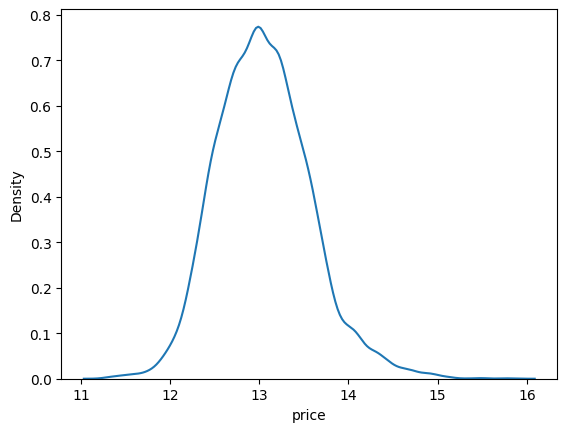

In [36]:
sns.kdeplot(y)

In [37]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15035 entries, 0 to 15034
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15035 non-null  int64  
 1   bedrooms       15035 non-null  int64  
 2   bathrooms      15035 non-null  float64
 3   sqft_living    15035 non-null  int64  
 4   sqft_lot       15035 non-null  int64  
 5   floors         15035 non-null  float64
 6   waterfront     15035 non-null  int64  
 7   view           15035 non-null  int64  
 8   condition      15035 non-null  int64  
 9   grade          15035 non-null  int64  
 10  sqft_above     15035 non-null  int64  
 11  sqft_basement  15035 non-null  int64  
 12  yr_built       15035 non-null  int64  
 13  yr_renovated   15035 non-null  int64  
 14  zipcode        15035 non-null  int64  
 15  lat            15035 non-null  float64
 16  long           15035 non-null  float64
 17  sqft_living15  15035 non-null  int64  
 18  sqft_l

In [55]:
# 사용할 feature 선정
features = [
    'month', 'bedrooms', 'bathrooms', 'floors',
    'sqft_living', 'sqft_basement', 'sqft_living15', 'sqft_lot15',
    'waterfront', 'view', 'zipcode','condition', 'grade', 'yr_built', 'yr_renovated'
]

categorical_features = ['waterfront', 'view', 'zipcode']
numerical_features = [col for col in features if col not in categorical_features]

X = train[features]
X_test = test[features]

# 범주형과 수치형 분리
random_state = 2020

# categorical_feature 숫자 인덱스로 변환
categorical_features_idx = [X.columns.get_loc(col) for col in categorical_features]

y_test(정답값), y_pred(모델 예측값) 둘 다 np.log1p()가 적용된 값이라서, np.expm1()로 다시 복원시켜 rmse값을 냄

In [56]:
# 모델 정의
model = LGBMRegressor(random_state=random_state)

# GridSearch 정의
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [1, 10],
    # 'learning_rate': [0.01, 0.05]
}

grid = GridSearchCV(
    LGBMRegressor(random_state=random_state, categorical_feature=categorical_features_idx),
    param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=2
)

grid.fit(X, y)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


/usr/local/lib/python3.12/dist-packages/lightgbm/basic.py:2137: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(


[LightGBM] [Warning] Met categorical feature which contains sparse values. Consider renumbering to consecutive integers started from zero
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001402 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1317
[LightGBM] [Info] Number of data points in the train set: 15035, number of used features: 15
[LightGBM] [Info] Start training from score 13.048122


GridSearchCV(cv=5,
             estimator=LGBMRegressor(categorical_feature=[8, 9, 10],
                                     random_state=2020),
             n_jobs=-1,
             param_grid={'max_depth': [1, 10], 'n_estimators': [50, 100]},
             scoring='neg_mean_squared_error', verbose=2)

GridSearchCV는 모델 자체를 바꾸는 게 아니라, '모델의 하이퍼파라미터를 가장 잘 조합해 주는 값을 찾을 때' 쓰는 도구

1. 우리가 정한 파라미터 후보 조합들을 전부 시도
2. 각 조합마다 K-Fold Cross Validation 수행
3. 평균 성능이 가장 좋은 조합 선택

주의할 점
파라미터가 너무 많으면 쓰지 마라. → RandomizedSearchCV가 적합
<br><br>
**train_test_split vs GridSearchCV**

train_test_split :<br>
모델 성능 평가용<br>
파라미터는 고정

GridSearchCV<br>
파라미터 탐색 + 성능 평가<br>
내부적으로 CV 자동 수행
<br><br>
**GridSearchCV vs RandomizedSearchCV**

GridSearchCV<br>
내가 후보를 정확히 알고 있을 때<br>
파라미터 수가 적을 때<br>
이 조합 중 최고가 뭔지 궁금할 때<br>

RandomizedSearchCV<br>
파라미터 많음<br>
범위 넓음<br>
대충 좋은 구간부터 찾고 싶을 때

→ 의외로 RandomizedSearchCV가 더 좋은 결과를 낼 때가 많다. Grid는 그리드에 없는 값은 영원히 못 보기 때문.
<br><br><br>

**model** : 튜닝할 모델 (예: LGBMRegressor())

**train** : 입력 데이터 X

**y** : 타깃 값 (price 등)

**param_grid** :  조합할 모든 파라미터 설정

**scoring='neg_mean_squared_error'** : MSE 기준 평가 (클수록 좋게 만들기 위해 음수로 만)

**cv=5** : 각 조합마다 5번 반복해서 돌릴 거임

**verbose=2** : GridSearch 진행 로그 출력 정도

**n_jobs=5** : 병렬 처리에 사용할 CPU 코어 수. CPU 5개 사용하겠다.
<br><br>

params = grid_model.cv_results_['params']<br>
score = grid_model.cv_results_['mean_test_score']

param: 파라미터 조합 목록<br>
score: 각 조합의 평균 CV 점수 (성능 평가 점수)
<br><br>

**GridSearchCV가 해주는 일**

**내가 하는 일**

1. 어떤 모델을 쓸지
2. 어떤 하이퍼파라미터를 볼지 (param_grid)
3. 어떤 성능 기준으로 평가할지 (scoring)
4. 검증 방법 (cv)
5. 출력 / 병렬 옵션 (verbose, n_jobs)
<br>

**GridSearchCV가 자동으로 해주는 것**

1. param_grid로 모든 조합 생성
2. 각 조합마다:
   - 모델 생성
   - K-Fold로 데이터 분할
   - fit() 수행
   - predict() 수행
   - scoring 기준으로 점수 계산
3. 각 조합의 CV 평균 점수 계산
4. 가장 좋은 조합 선택
5. 결과 정리해서 저장
<br>

하지만 GridSearchCV가 자동으로 test.csv 예측까지 해준다 (X)<br>
GridSearchCV는 train 데이터 안에서 CV 기준으로만 평가

"내가 정한 모델로 내가 정한 조건들을 가지고 한번씩 다 시험해봐"라고 범위를 정해주면,<br>
GridSearchCV가 그 안에서 가능한 모든 경우를 직접 돌려보면서 데이터를 나눠 여러 번 학습시키고,<br>
평균 성적을 계산해 가장 잘한 설정을 찾아준다.


In [59]:
# from sklearn.metrics import mean_squared_error

# def rmse(y_test, y_pred):
#     return np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(y_pred)))

In [60]:
# 최적의 파라미터를 가지고 모델 예측 진행
best_model = grid.best_estimator_
print("Best Params:", grid.best_params_)

prediction = np.expm1(best_model.predict(X_test))  # 아까 y에 log 변환시켰으니까 다시 되돌린 것.
print(prediction[:5])  # 상위 5개 예측값 확인

# CV 점수 확인 (neg_mean_squared_error 기준)
cv_score = np.sqrt(-grid.best_score_)   # RMSE 계산
print("CV Score (RMSE):", cv_score)

Best Params: {'max_depth': 10, 'n_estimators': 100}
[ 541212.60728927  498243.07366525 1312566.52820828  299559.36998589
  327569.25639595]
CV Score (RMSE): 0.17457019770379106


In [49]:
# 제출할 submission 파일 불러오기
uploaded = files.upload()

submission = pd.read_csv("sample_submission.csv")
submission.head()

,id,price
0,15035,100000
1,15036,100000
2,15037,100000
3,15038,100000
4,15039,100000


In [43]:
# 기존 파일에 새로운 모델 예측값 덮어씌우기
submission['price'] = prediction
submission.head()

,id,price
0,15035,5.490584e+05
1,15036,4.453621e+05
2,15037,1.362617e+06
3,15038,3.310387e+05
4,15039,3.327009e+05


In [44]:
# 파일 이름 바꿔서 저장
cv_score = 0.18008210088944274
submission_csv_path = f'submission_lgbm_RMSLE_{cv_score:.6f}.csv'
submission.to_csv(submission_csv_path, index=False)
print(f'{submission_csv_path} saved!')

submission_lgbm_RMSLE_0.180082.csv saved!


주의!! <br>
구글 코랩에서는 로컬에서 불러온 파일을 덮어씌워서 저장할 수 없다. 아래 코드를 실행하면 content라는 폴더에 저장되며, 화면의 왼쪽에 아이콘들 중에 폴더 아이콘을 선택하면 내가 저장한 파일을 볼 수 있음